In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import argrelextrema

In [157]:
from kneed import KneeLocator, DataGenerator as dg

## Curves

In [183]:
from scipy.interpolate import UnivariateSpline

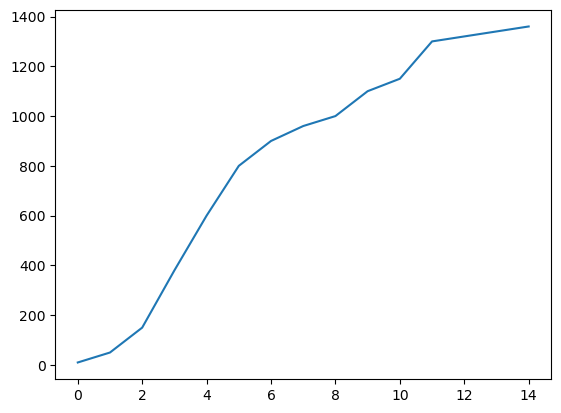

In [184]:
y_1 = [10, 50, 150, 380, 600, 800, 900, 960, 1000, 1100, 1150, 1300, 1320, 1340, 1360]
x_1 = [i for i in range(len(y_1))]

plt.plot(x_1, y_1)

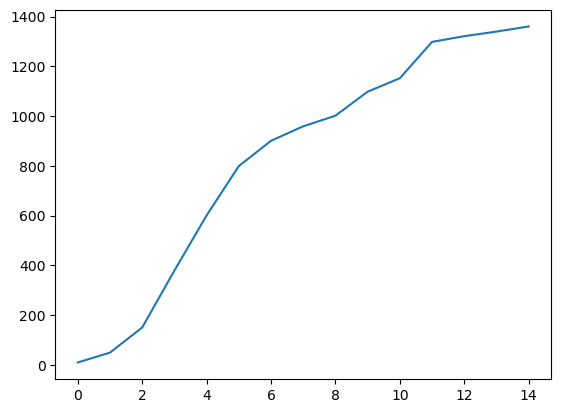

In [193]:
cs = UnivariateSpline(x_1, y_1)
cs.set_smoothing_factor(20)
plt.plot(x_1, cs(x_1), label='Cubic Spline')

In [194]:
y_1, cs(x_1)

([10,
  50,
  150,
  380,
  600,
  800,
  900,
  960,
  1000,
  1100,
  1150,
  1300,
  1320,
  1340,
  1360],
 array([  10.05249521,   49.73123422,  150.60163659,  379.17882958,
         600.84974164,  799.19099779,  900.83931226,  958.9343128 ,
        1001.502019  , 1098.03467914, 1152.16072618, 1298.14650553,
        1321.12646877, 1339.58030502, 1360.07073626]))

In [159]:
def invert(x, y):
    x = np.array(x)
    y = np.array(y)
    
    y = np.max(y) - y
    x = np.max(x) - x
    
    return x, y

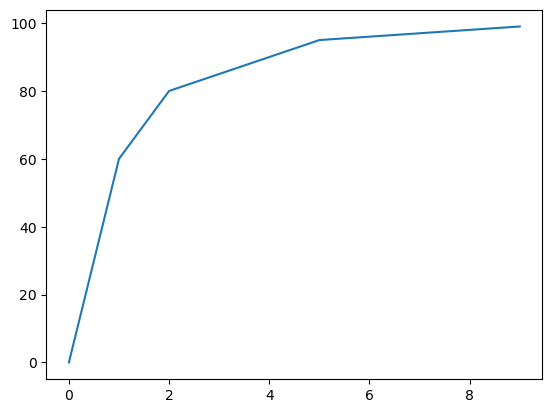

In [181]:
x_2, y_2 = dg.concave_increasing()
plt.plot(x_2, y_2)

# x_2, y_2 = invert(x_2, y_2)
# plt.plot(x_2, y_2)
# plt.legend(['Original', 'Inverted'])

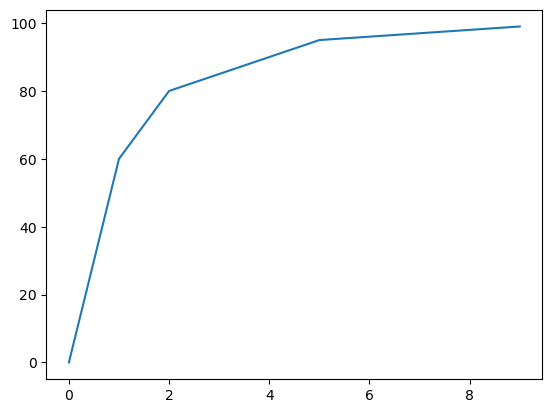

In [182]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(x_2, y_2)
plt.plot(x_2, cs(x_2), label='Cubic Spline')

In [161]:
def max_min(x, y):
    x = np.array(x)
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    
    y = np.array(y)
    y = (y - np.min(y)) / (np.max(y) - np.min(y))
    
    return x, y

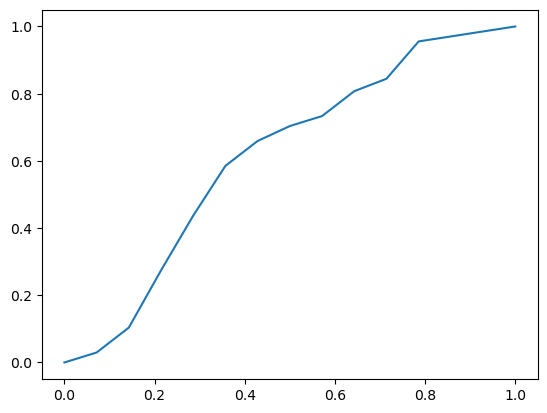

In [162]:
x_1, y_1 = max_min(x_1, y_1)

plt.plot(x_1, y_1)

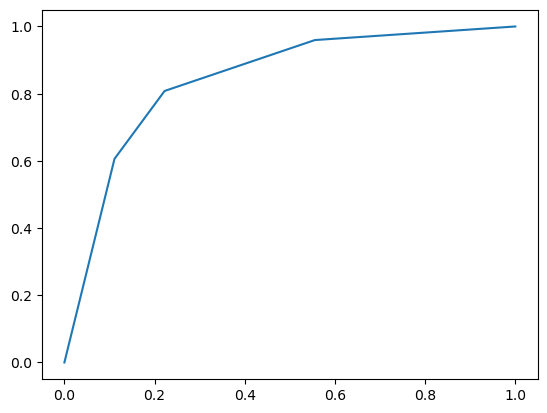

In [163]:
x_2, y_2 = max_min(x_2, y_2)

plt.plot(x_2, y_2)

In [164]:
def differences(x, y):
    return y - x

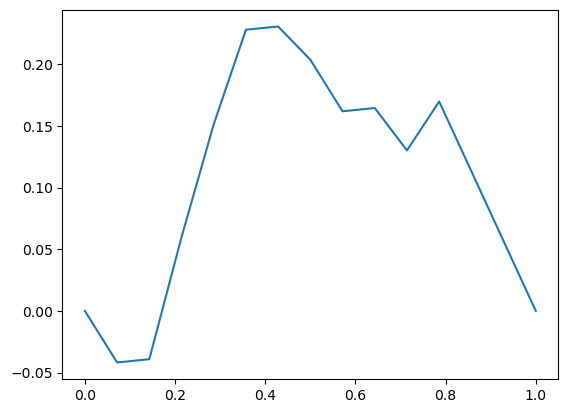

In [165]:
y_1 = differences(x_1, y_1)

plt.plot(x_1, y_1)

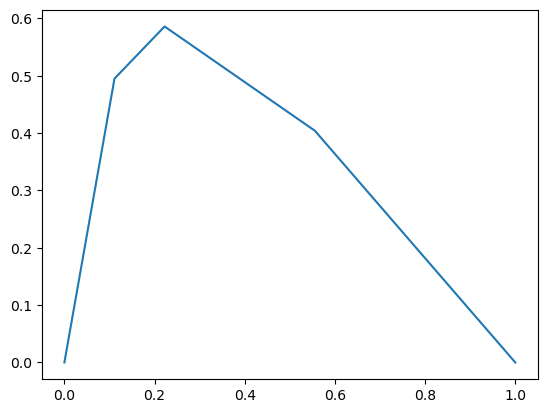

In [166]:
y_2 = differences(x_2, y_2)

plt.plot(x_2, y_2)

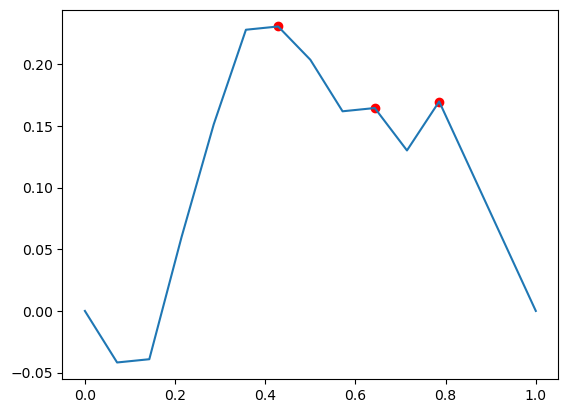

In [167]:
maxima_idxs = argrelextrema(y_1, np.greater)
plt.plot(x_1, y_1)
plt.scatter(x_1[maxima_idxs], y_1[maxima_idxs], c='r')

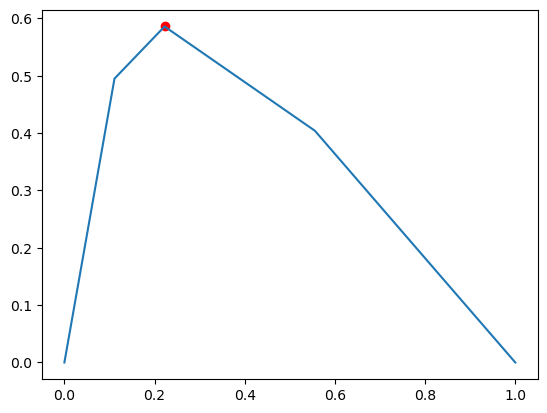

In [168]:
maxima_idxs_2 = argrelextrema(y_2, np.greater)
plt.plot(x_2, y_2)
plt.scatter(x_2[maxima_idxs_2], y_2[maxima_idxs_2], c='r')

In [169]:
S = 1

const = S * np.sum([x_1[maxima_idxs][i + 1] - x_1[maxima_idxs][i] for i in range(len(x_1[maxima_idxs]) - 1)]) / ((len(x_1[maxima_idxs]) - 1))
Ts = [y - const for y in y_1[maxima_idxs]]

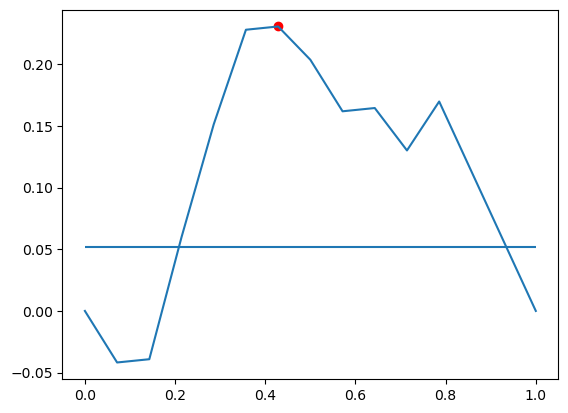

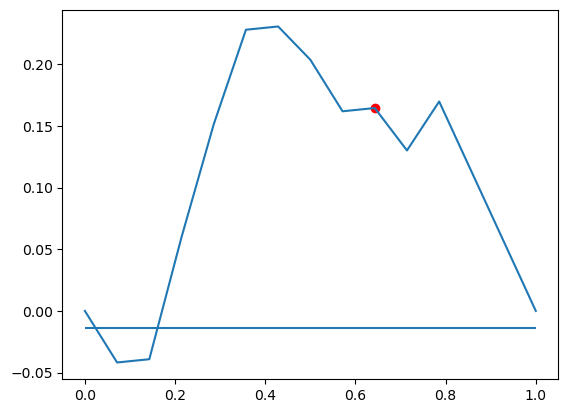

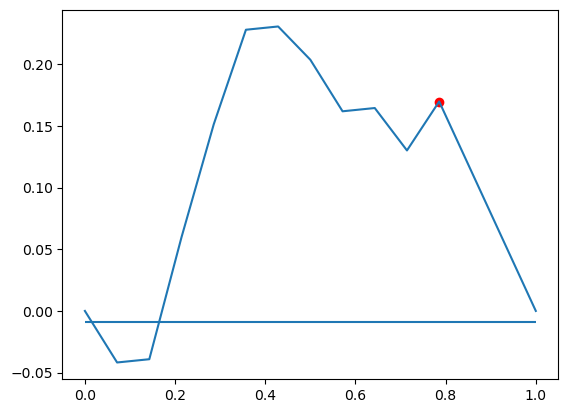

In [170]:
for i, maxima in enumerate(maxima_idxs[0]):
    plt.figure()
    plt.plot(x_1, y_1)
    plt.scatter(x_1[maxima], y_1[maxima], c='r')
    plt.hlines(y=Ts[i], xmin=x_1[0], xmax=x_1[-1])

In [171]:
S = 1

const = S * np.sum([x_2[maxima_idxs_2][i + 1] - x_2[maxima_idxs_2][i] for i in range(len(x_2[maxima_idxs_2]) - 1)]) / ((len(x_2[maxima_idxs_2]) - 1))
Ts = [y - const for y in y_2[maxima_idxs_2]]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2428\2934973565.py:3: RuntimeWarning: invalid value encountered in double_scalars
  const = S * np.sum([x_2[maxima_idxs_2][i + 1] - x_2[maxima_idxs_2][i] for i in range(len(x_2[maxima_idxs_2]) - 1)]) / ((len(x_2[maxima_idxs_2]) - 1))


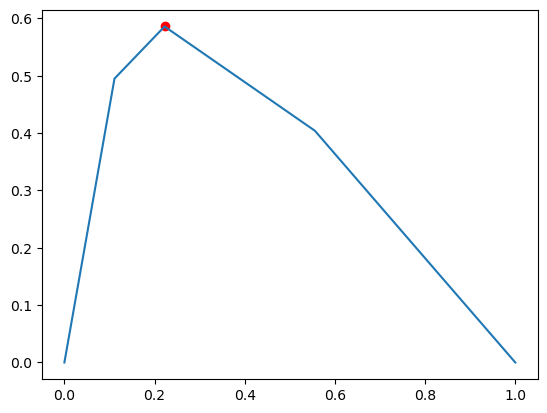

In [172]:
for i, maxima in enumerate(maxima_idxs_2[0]):
    plt.figure()
    plt.plot(x_2, y_2)
    plt.scatter(x_2[maxima], y_2[maxima], c='r')
    plt.hlines(y=Ts[i], xmin=x_2[0], xmax=x_2[-1])